In [1]:
#%matplotlib widget
#%matplotlib notebook 
#use this to enable interactivity  e.g rotate 3-D plot
import matplotlib.pyplot as plt 
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')

# White noise
A stochastic process/ time series  $X(t)$is called a white nose 
if it's spetral density  (or say Fourier transformation of correction function ) is uniform . It can be shown that the corresponding correlation function is

$
\langle X(t)X(t') \rangle = A \delta(t-t')
$  for some constant $A$ .

For example a $\textbf{Gaussian white noise} $ (stationary Gaussian process) . The following is the simmulation of Gaussian white noise .

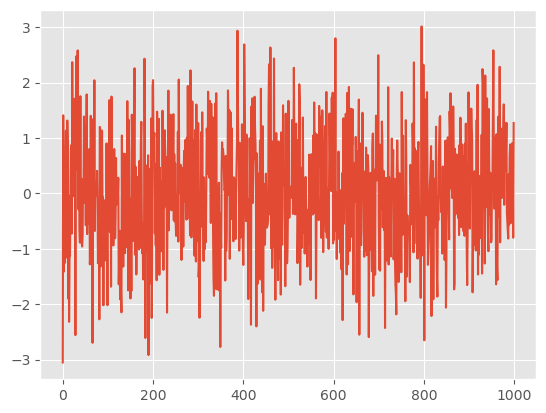

In [2]:
mean = 0
std = 1 
num_samples = 1000
samples = np.random.normal(mean, std, size=num_samples)

plt.plot(samples)

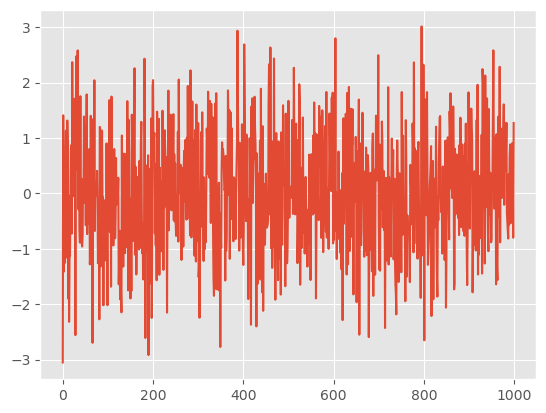

In [3]:
def white_noise(n,mean,std):
    sample = np.random.normal(mean,std,size=n)
    plt.plot(samples)
white_noise(1000,0,0.33)

# Brownian motion
Brownian motion is the motion of particle with drift velocity and experiencing random force follows Gaussian distribution (e.g the white noise above) .A simple case which partilces' motion governed by Langevin equation  as follow :
  \begin{equation}
m\frac{d\mathbf{V}(t)}{dt}=\color{blue}{-\zeta\mathbf{V}(t)}+\color{red}{\mathbf{F}(t)} 
\end{equation} 
\begin{equation}
\langle \mathbf{F}(t)\rangle=\mathbf{0} 
\end{equation}

\begin{equation}
\langle \mathbf{F}(t)\mathbf{F}(0)\rangle = {2k_B T\zeta}\mathbf{I}\delta(t)  
\end{equation}

In [4]:
dim = 3
n_p =100 # number of particles
n_t =1024 # number of simulation steps or time
dt =0.05 # time increment 
zeta = 1 #friction constant 
m = 1 # mass of particle
KBT = 1
std =  np.sqrt(2*KBT*zeta*dt) # std of ∆W
R = np.zeros([dim,n_p]) #current position of all particles
V = np.zeros([dim,n_p]) #current velocity of all particles
W = np.zeros([dim,n_p]) #current random force

#realization of path and resulting random variables
Rs = np.zeros([dim,n_p,n_t]) # positions of all particles during simulation
Vs = np.zeros([dim,n_p,n_t]) # velocities of all particles during simulation
Ws = np.zeros([dim,n_p,n_t]) # random force of all particles during simulation
time =np.zeros([n_t]) # time at all steps

In [5]:
#perform the simulation
for i in range(n_t):
    W = std*np.random.randn( dim ,n_p ) #sample a random fore at time i from centered normal with std
    R , V  = R + V*dt , V*(1-zeta/m*dt) + W/m  # update the motion according to the mechanicsim 
    Rs[:,:,i] =R # record the position at time i 
    Vs[:,:,i] =V # record the velocity at time i
    Ws[:,:,i] =W # record the random force at time i 
    time[i] = i*dt

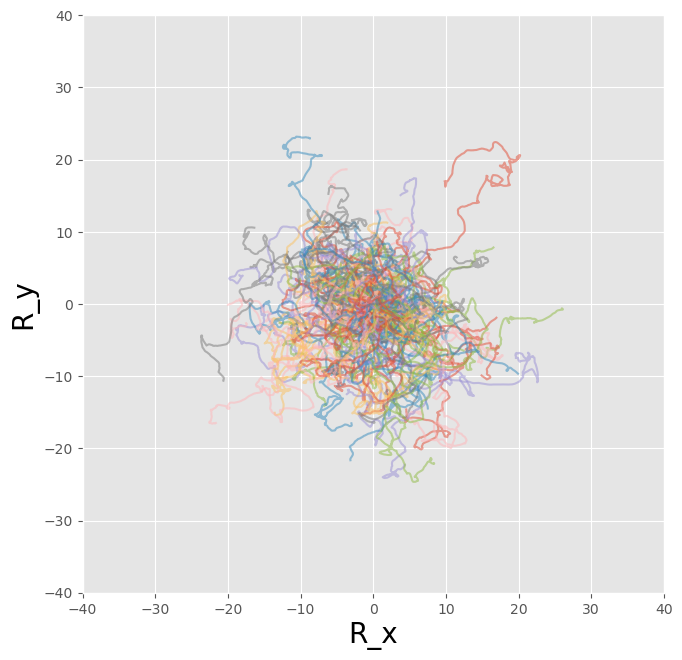

In [6]:
# 2-D plot of trajectory
box = 80 # draw area 80*80
fig , ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r"R_x" , fontsize=20) # set x-label
ax.set_ylabel(r"R_y" , fontsize=20) # set y-label
plt.xlim(-box/2 , box/2)
plt.ylim(-box/2,box/2)

for i in range(n_p): #plot trajectory of each particle
    ax.plot(Rs[0, i ,0: n_t ],Rs[ 1 , i , 0:n_t ] , alpha =0.5)


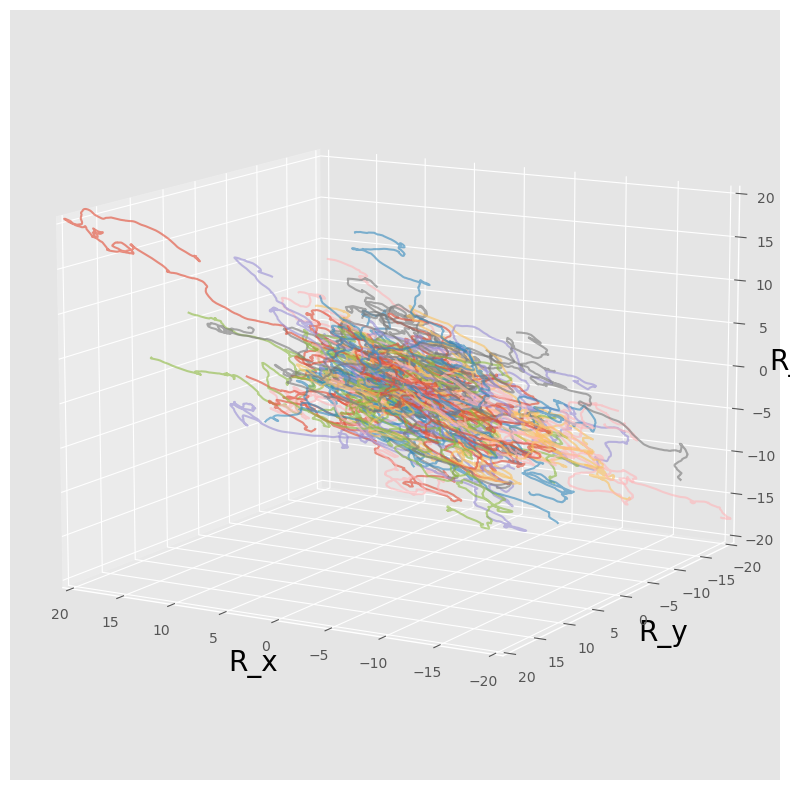

In [7]:
#3D plot
box = 40 # draw area 40*40
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection = '3d')
ax.set_xlabel(r"R_x" , fontsize=20) # set x-label
ax.set_ylabel(r"R_y" , fontsize=20) # set y-label
ax.set_zlabel(r"R_z" , fontsize=20) 

ax.set_xlim(-box/2 , box/2)
ax.set_ylim(-box/2,box/2)
ax.set_zlim(-box/2,box/2)
ax.view_init(elev = 12 , azim =120) #set view point
for i in range(n_p): #plot trajectory of each particle
    ax.plot(Rs[0, i ,0: n_t ],Rs[ 1 , i , 0:n_t ] , Rs[ 1 , i , 0:n_t ] , alpha =0.6)
plt.show()

# Q: Why in 3-D plot , trajectories look like only stay on some plan